In [20]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

In [21]:
import cv2 as cv

imgc = cv.imread(path + "rayo.png")
img = cv.cvtColor(imgc, cv.COLOR_BGR2GRAY)
ret,th = cv.threshold(img,127,255,0)

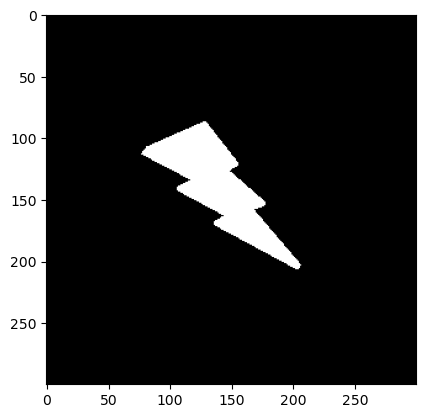

In [22]:
from matplotlib import pyplot as plt


plt.imshow(th,cmap="gray")

# **SACAR LOS BORDES DE UNA IMAGEN**

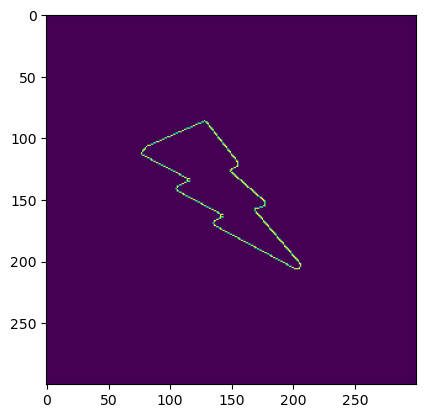

In [23]:
umbral_min=50
umbral_max=100
cn = cv.Canny(th,umbral_min,umbral_max)
plt.imshow(cn)

1
Centro: X:139 Y:139
ÁREA:4933.5 - PERÍMETRO:435.91377425193787


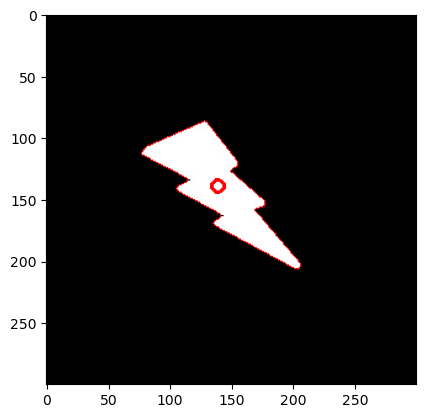

In [24]:
contornos, jerarquia = cv.findContours(cn.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
# Número de contornos de la imagen
print(len(contornos))
cnt = contornos[0]
# Momentos del contorno, que nos sirve para hayar el centro
M = cv.moments(cnt)

if M['m00']:
    # IMPORTANTE ESTO DA EL CENTRO
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(f"Centro: X:{cx} Y:{cy}")

    # Dibujar el centro de la imagen
    cv.circle(imgc, (cx, cy), 5, (255, 0, 0), 2)

area = cv.contourArea(cnt)
perimetro = cv.arcLength(cnt,True)
print(f"ÁREA:{area} - PERÍMETRO:{perimetro}")

cv.drawContours(imgc,[cnt],-1,(255,0,0),1)
plt.imshow(imgc)
img2 = imgc.copy()


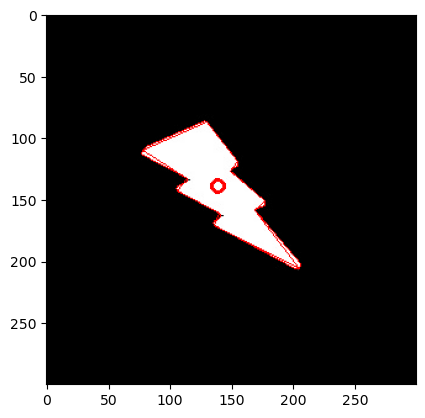

In [25]:
# Redondear el contorno para que no sea tanto proceso
approx = cv.approxPolyDP(cnt,0.01*perimetro,True)
# COlOR EN RGB
cv.drawContours(imgc,[approx],-1,(255,0,0),1)
plt.imshow(imgc)

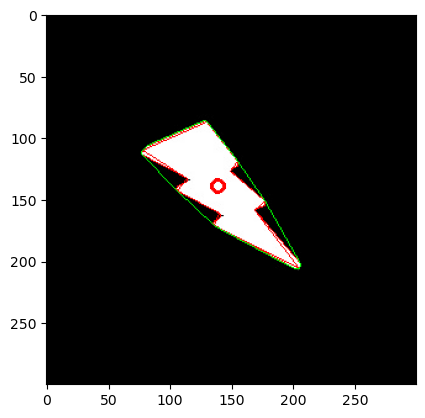

In [26]:
hull = cv.convexHull(cnt)
img2 = imgc.copy()
cv.drawContours(img2,[hull],-1,(0,255,0),1)

plt.imshow(img2)

# **Cuadrado Contorno**

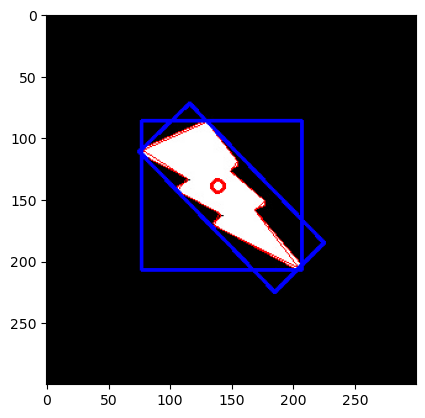

In [27]:

import numpy as np


img2 = imgc.copy()
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 2)

rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.intp(box)
cv.drawContours(img2,[box],0,(0,0,255),2)


plt.imshow(img2)

# **Elipsis y círculo**

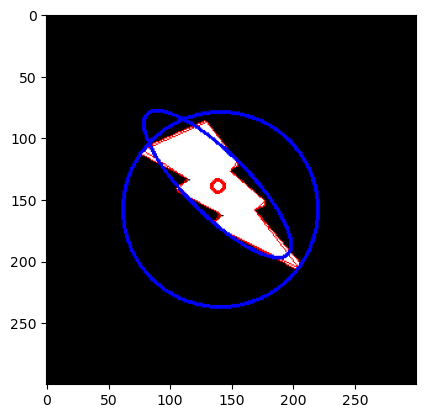

In [28]:
(x,y),radius = cv.minEnclosingCircle(cnt)
img2 = imgc.copy()
cv.circle(img2, (int(x), int(y)), int(radius), (0,0,255), 2)

elipse = cv.fitEllipse(cnt)
cv.ellipse(img2, elipse,  (0,0,255), 2)

plt.imshow(img2)